### Цель работы: 
Изучение теоретических принципов и инструментальных средств для построения пайплайна для предварительной обработки данных.

### Основные задачи:
- предварительная обработка данных;
- изучение библиотек для предварительной обработки данных;
- масштабирование признаков;
- представление категориальных данных;
- построение пайплайна для предварительной обработки данных.

### Описание данных

Дан файл Building_Permits.csv, содержащий следующие данные по разрешениям на строительство помещений:

- Permit Number - Номер разрешения
- Permit Type - Тип разрешения (целевая переменная)
- Permit Type Definition - Определение типа разрешения
- Permit Creation Date - Дата создания разрешения
- Block - Участок
- Lot - Лот
- Street Number - Номер улицы
- Street Number Suffix - Суффикс номера улицы
- Street Name - Название улицы
- Street Suffix - Суффикс улицы
- Unit - Помещение
- Unit Suffix - Суффикс помещения
- Description - Описание
- Current Status - Текущий статус
- Current Status Date - Дата текущего статуса
- Filed Date - Дата подачи
- Issued Date - Дата выдачи
- Completed Date - Дата завершения
- First Construction Document Date - Дата первого строительного документа
- Structural Notification - Структурное уведомление
- Number of Existing Stories - Количество существующих этажей
- Number of Proposed Stories - Количество предложенных этажей
- Voluntary Soft-Story Retrofit - Добровольный ретрофит мягкой конструкции
- Fire Only Permit - Разрешение только на пожарные работы
- Permit Expiration Date - Дата истечения разрешения
- Estimated Cost - Оценочная стоимость 
- Revised Cost - Пересмотренная стоимость
- Existing Use - Существующее использование
- Existing Units - Существующие единицы
- Proposed Use - Предложенное использование
- Proposed Units - Предложенные единицы
- Plansets - Наборы планов
- TIDF Compliance - Соответствие TIDF
- Existing Construction Type - Существующий тип строительства
- Existing Construction Type Description - Описание существующего типа строительства
- Proposed Construction Type - Предложенный тип строительства
- Proposed Construction Type Description - Описание предложенного типа строительства
- Site Permit - Разрешение на участок
- Supervisor District - Район надзора
- Neighborhoods - Analysis Boundaries - Границы анализа районов
- Zipcode - Почтовый индекс
- Location - Местоположение
- Record ID - Идентификатор записи


## Загрузка исходного датасета

In [1]:
import pandas as pd

df = pd.read_csv('Building_Permits.csv')
print(df.shape)
df.head()

C:\Users\nastya-pls\AppData\Local\Temp\ipykernel_1524\1051871948.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
C:\Users\nastya-pls\AppData\Local\Temp\ipykernel_1524\1051871948.py:3: DtypeWarning: Columns (22,32) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Building_Permits.csv')


(198900, 43)


,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,201505065519,4,sign - erect,05/06/2015,0326,023,140,NaN,Ellis,St,...,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",1380611233945
1,201604195146,4,sign - erect,04/19/2016,0306,007,440,NaN,Geary,St,...,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",1420164406718
2,201605278609,3,additions alterations or repairs,05/27/2016,0595,203,1647,NaN,Pacific,Av,...,1.0,constr type 1,1.0,constr type 1,NaN,3.0,Russian Hill,94109.0,"(37.7946573324287, -122.42232562979227)",1424856504716
3,201611072166,8,otc alterations permit,11/07/2016,0156,011,1230,NaN,Pacific,Av,...,5.0,wood frame (5),5.0,wood frame (5),NaN,3.0,Nob Hill,94109.0,"(37.79595867909168, -122.41557405519474)",1443574295566
4,201611283529,6,demolitions,11/28/2016,0342,001,950,NaN,Market,St,...,3.0,constr type 3,NaN,NaN,NaN,6.0,Tenderloin,94102.0,"(37.78315261897309, -122.40950883997789)",144548169992


## Обработка данных датасета

Проведите первичный анализ загруженных данных. Выполним следующие шаги:
- количество пропусков в каждом признаке;
- распределения признаков;
- возможные выбросы или аномалии.

По результатам анализа сделаем выводы о свойствах отдельных признаков и качестве данных в целом.

### Определим количество пропусков

In [2]:
df.isna().sum()

Permit Number                                  0
Permit Type                                    0
Permit Type Definition                         0
Permit Creation Date                           0
Block                                          0
Lot                                            0
Street Number                                  0
Street Number Suffix                      196684
Street Name                                    0
Street Suffix                               2768
Unit                                      169421
Unit Suffix                               196939
Description                                  290
Current Status                                 0
Current Status Date                            0
Filed Date                                     0
Issued Date                                14940
Completed Date                            101709
First Construction Document Date           14946
Structural Notification                   191978
Number of Existing S

Проверим процент пропусков для данных столбцов

In [3]:
print(df.shape)
df.isna().sum()/df.shape[0]

(198900, 43)


Permit Number                             0.000000
Permit Type                               0.000000
Permit Type Definition                    0.000000
Permit Creation Date                      0.000000
Block                                     0.000000
Lot                                       0.000000
Street Number                             0.000000
Street Number Suffix                      0.988859
Street Name                               0.000000
Street Suffix                             0.013917
Unit                                      0.851790
Unit Suffix                               0.990141
Description                               0.001458
Current Status                            0.000000
Current Status Date                       0.000000
Filed Date                                0.000000
Issued Date                               0.075113
Completed Date                            0.511357
First Construction Document Date          0.075143
Structural Notification        

При этапе data preparation принято удалять столбцы, пропуск в которых составляет более 20 %

Те колонки, где процент пустых значений составляет более 20%, мы удалим, так как такие столбцы имеют большое количество пропусков

In [4]:
for col in df.columns:
    if df[col].isna().sum() / df.shape[0] >= 0.20:
        df.drop(col, axis=1, inplace=True)

print(df.shape)
df.isna().sum()/ df.shape[0]

(198900, 23)


Permit Number                          0.000000
Permit Type                            0.000000
Permit Type Definition                 0.000000
Permit Creation Date                   0.000000
Block                                  0.000000
Lot                                    0.000000
Street Number                          0.000000
Street Name                            0.000000
Street Suffix                          0.013917
Description                            0.001458
Current Status                         0.000000
Current Status Date                    0.000000
Filed Date                             0.000000
Issued Date                            0.075113
First Construction Document Date       0.075143
Estimated Cost                         0.191383
Revised Cost                           0.030498
Plansets                               0.187577
Supervisor District                    0.008632
Neighborhoods - Analysis Boundaries    0.008673
Zipcode                                0

Узнаем сколько строк имеют в себе более 22 пропусков(то есть больше половины данных) и удалим их

In [5]:
df_miss_row = df[df.isna().sum(axis=1) >= 22]
df_miss_row.shape

(0, 23)

Таких строк мы не нашли, потому можем перейти к обработке пропусков в данных

### Обработка пропусков в данных

У нас имеется около 11 признаков, для которых необходимо произвести заполнение пропущенных данных. Проверим, какие из признаков категориальные, а какие количественные

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198900 entries, 0 to 198899
Data columns (total 23 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   Permit Number                        198900 non-null  object 
 1   Permit Type                          198900 non-null  int64  
 2   Permit Type Definition               198900 non-null  object 
 3   Permit Creation Date                 198900 non-null  object 
 4   Block                                198900 non-null  object 
 5   Lot                                  198900 non-null  object 
 6   Street Number                        198900 non-null  int64  
 7   Street Name                          198900 non-null  object 
 8   Street Suffix                        196132 non-null  object 
 9   Description                          198610 non-null  object 
 10  Current Status                       198900 non-null  object 
 11  Current Statu

In [7]:
import pandas as pd

categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Категориальные признаки:")
cat_columns = []
for col in categorical_columns:
    print(col)
    cat_columns.append(col)

print("\nКоличественные признаки:")
num_columns = []
for col in numerical_columns:
    print(col)
    num_columns.append(col)

Категориальные признаки:
Permit Number
Permit Type Definition
Permit Creation Date
Block
Lot
Street Name
Street Suffix
Description
Current Status
Current Status Date
Filed Date
Issued Date
First Construction Document Date
Neighborhoods - Analysis Boundaries
Location

Количественные признаки:
Permit Type
Street Number
Estimated Cost
Revised Cost
Plansets
Supervisor District
Zipcode
Record ID


Сначала обработаем данные, которые имеют числовой тип и заполним эти пропуски медианным значением признака с помощью библиотеки SimpleImputer

In [8]:
df[num_columns].isna().sum()

Permit Type                0
Street Number              0
Estimated Cost         38066
Revised Cost            6066
Plansets               37309
Supervisor District     1717
Zipcode                 1716
Record ID                  0
dtype: int64

In [9]:
from sklearn.impute import SimpleImputer
import numpy as np

imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imputer = imputer.fit(df[num_columns])
df[num_columns] = df[num_columns].copy()
df[num_columns] = imputer.transform(df[num_columns])
df.head()

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Name,Street Suffix,Description,...,Issued Date,First Construction Document Date,Estimated Cost,Revised Cost,Plansets,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,201505065519,4.0,sign - erect,05/06/2015,0326,023,140.0,Ellis,St,"ground fl facade: to erect illuminated, electr...",...,11/09/2015,11/09/2015,4000.0,4000.000000,2.0,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",1.380611e+12
1,201604195146,4.0,sign - erect,04/19/2016,0306,007,440.0,Geary,St,remove (e) awning and associated signs.,...,08/03/2017,08/03/2017,1.0,500.000000,2.0,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",1.420164e+12
2,201605278609,3.0,additions alterations or repairs,05/27/2016,0595,203,1647.0,Pacific,Av,installation of separating wall,...,NaN,NaN,20000.0,132856.186492,2.0,3.0,Russian Hill,94109.0,"(37.7946573324287, -122.42232562979227)",1.424857e+12
3,201611072166,8.0,otc alterations permit,11/07/2016,0156,011,1230.0,Pacific,Av,repair dryrot & stucco at front of bldg.,...,07/18/2017,07/18/2017,2000.0,2000.000000,2.0,3.0,Nob Hill,94109.0,"(37.79595867909168, -122.41557405519474)",1.443574e+12
4,201611283529,6.0,demolitions,11/28/2016,0342,001,950.0,Market,St,demolish retail/office/commercial 3-story buil...,...,12/01/2017,11/20/2017,100000.0,100000.000000,2.0,6.0,Tenderloin,94102.0,"(37.78315261897309, -122.40950883997789)",1.445482e+11


In [10]:
df[num_columns].isna().sum()

Permit Type            0
Street Number          0
Estimated Cost         0
Revised Cost           0
Plansets               0
Supervisor District    0
Zipcode                0
Record ID              0
dtype: int64

В итоге обработки у нас не осталось пропусков в количественных признаках

Проверим количество уникальных признаков в категориальных признаках:

In [11]:
import pandas as pd

num_unique = df[cat_columns].nunique()
print(f'Количество уникальных значений в столбце {cat_columns}: {num_unique}')

for column in cat_columns:
    unique_values = df[column].unique()
    print(f'Уникальные значения в столбце {column}: {unique_values}')

Количество уникальных значений в столбце ['Permit Number', 'Permit Type Definition', 'Permit Creation Date', 'Block', 'Lot', 'Street Name', 'Street Suffix', 'Description', 'Current Status', 'Current Status Date', 'Filed Date', 'Issued Date', 'First Construction Document Date', 'Neighborhoods - Analysis Boundaries', 'Location']: Permit Number                          181495
Permit Type Definition                      8
Permit Creation Date                     1291
Block                                    4896
Lot                                      1055
Street Name                              1704
Street Suffix                              21
Description                            134272
Current Status                             14
Current Status Date                      1307
Filed Date                               1288
Issued Date                              1289
First Construction Document Date         1288
Neighborhoods - Analysis Boundaries        41
Location                  

После анализа уникальных значений категориальных признаков пришли к выводу, что пропуски в этих данных нельзя однозначно определить с помощью метода K ближайших соседей, потому заменим пропуски значением "Unknown" с помощью метода SimpleImputer

In [12]:
from sklearn.impute import SimpleImputer

imp_const_unknown = SimpleImputer(strategy='constant', fill_value='Unknown')

df[cat_columns] = imp_const_unknown.fit_transform(df[cat_columns])
df[cat_columns].head()

,Permit Number,Permit Type Definition,Permit Creation Date,Block,Lot,Street Name,Street Suffix,Description,Current Status,Current Status Date,Filed Date,Issued Date,First Construction Document Date,Neighborhoods - Analysis Boundaries,Location
0,201505065519,sign - erect,05/06/2015,0326,023,Ellis,St,"ground fl facade: to erect illuminated, electr...",expired,12/21/2017,05/06/2015,11/09/2015,11/09/2015,Tenderloin,"(37.785719256680785, -122.40852313194863)"
1,201604195146,sign - erect,04/19/2016,0306,007,Geary,St,remove (e) awning and associated signs.,issued,08/03/2017,04/19/2016,08/03/2017,08/03/2017,Tenderloin,"(37.78733980600732, -122.41063199757738)"
2,201605278609,additions alterations or repairs,05/27/2016,0595,203,Pacific,Av,installation of separating wall,withdrawn,09/26/2017,05/27/2016,Unknown,Unknown,Russian Hill,"(37.7946573324287, -122.42232562979227)"
3,201611072166,otc alterations permit,11/07/2016,0156,011,Pacific,Av,repair dryrot & stucco at front of bldg.,complete,07/24/2017,11/07/2016,07/18/2017,07/18/2017,Nob Hill,"(37.79595867909168, -122.41557405519474)"
4,201611283529,demolitions,11/28/2016,0342,001,Market,St,demolish retail/office/commercial 3-story buil...,issued,12/01/2017,11/28/2016,12/01/2017,11/20/2017,Tenderloin,"(37.78315261897309, -122.40950883997789)"


Проверим количество пропусков после обработки данных

In [13]:
df[cat_columns].isna().sum()

Permit Number                          0
Permit Type Definition                 0
Permit Creation Date                   0
Block                                  0
Lot                                    0
Street Name                            0
Street Suffix                          0
Description                            0
Current Status                         0
Current Status Date                    0
Filed Date                             0
Issued Date                            0
First Construction Document Date       0
Neighborhoods - Analysis Boundaries    0
Location                               0
dtype: int64

Пропусков не осталось, поэтому можем перейти к следующим шагам

## Обработка категориальных признаков

Перед обработкой категориальных признаков сделаем кодирование категориальных признаков. Так как признаков итак много, то мы будем использовать метод LabelEncoder, что позволит нам не создавать дополнительных колонок и использовать имеющиеся при обучении модели

### Использование LabelEncoder

In [14]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

for column in cat_columns:
    df[column] = labelencoder.fit_transform(df[column])

df.head()

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Name,Street Suffix,Description,...,Issued Date,First Construction Document Date,Estimated Cost,Revised Cost,Plansets,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,64721,4.0,6,472,325,351,140.0,531,16,43094,...,1118,1118,4000.0,4000.000000,2.0,3.0,35,94102.0,47339,1.380611e+12
1,92971,4.0,6,411,304,135,440.0,642,16,76762,...,780,780,1.0,500.000000,2.0,3.0,35,94102.0,48508,1.420164e+12
2,96216,3.0,0,545,516,725,1647.0,1190,1,51707,...,1289,1288,20000.0,132856.186492,2.0,3.0,31,94109.0,52324,1.424857e+12
3,109183,8.0,5,1115,148,206,1230.0,1190,1,83054,...,724,724,2000.0,2000.000000,2.0,3.0,20,94109.0,52936,1.443574e+12
4,110493,6.0,1,1177,341,1,950.0,1006,16,34019,...,1185,1156,100000.0,100000.000000,2.0,6.0,35,94102.0,45662,1.445482e+11


### Использование OneHotEncoder

Если же признаков изначально мало, то имеет смысл воспользоваться методом OneHotEncoder, что позволит увеличить точность будущей модели за счет добавления новых признаков.

Однако, в нашей обработке мы не будем использовать этот метод

In [15]:
# from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# import pandas as pd

# X = df.drop(columns=['Permit Type'])
# y = df['Permit Type']

# labelencoder_X = LabelEncoder()
# X_encoded = X.copy()

# for column in X_encoded.select_dtypes(include=['object']).columns:
#     X_encoded[column] = labelencoder_X.fit_transform(X_encoded[column])

# # Применяем OneHotEncoding
# onehotencoder = OneHotEncoder(sparse=False)
# X_encoded = onehotencoder.fit_transform(X_encoded)

# print("Перекодировка категориального признака")
# print(X_encoded)

## Масштабирование признаков

<Figure size 1000x1000 with 0 Axes>

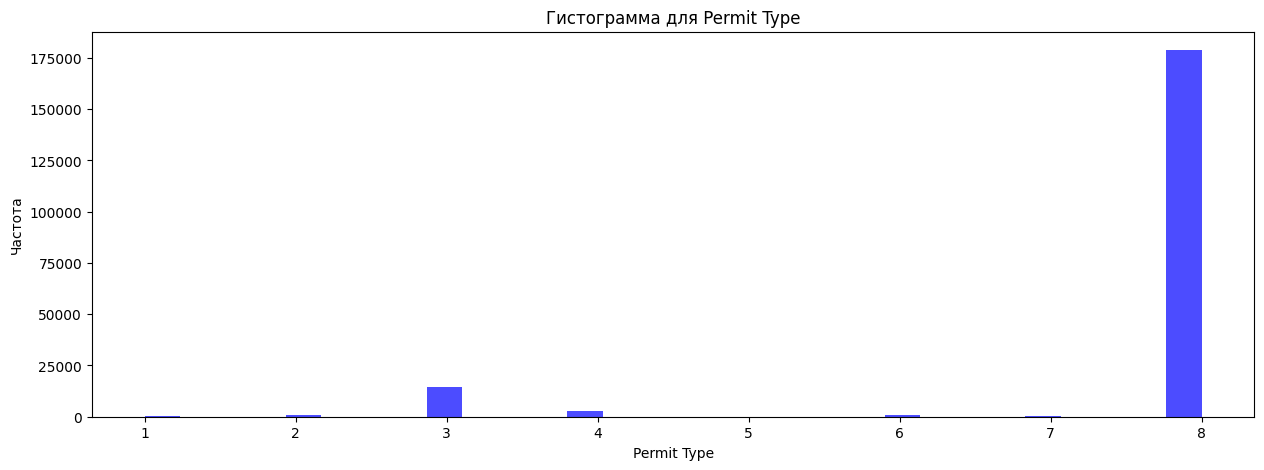

Минимальное значение : 1.0
Максимальное значение : 8.0


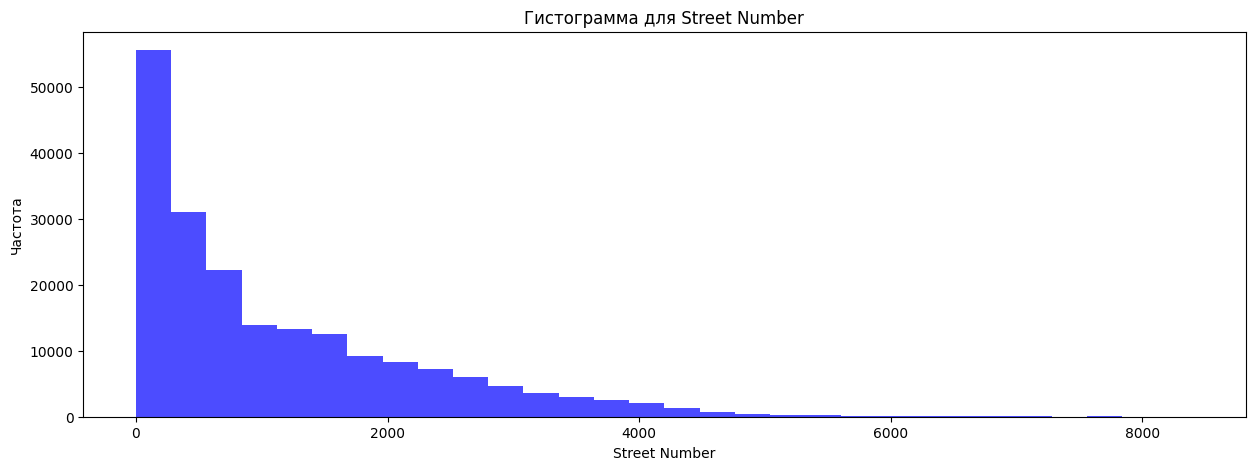

Минимальное значение : 0.0
Максимальное значение : 8400.0


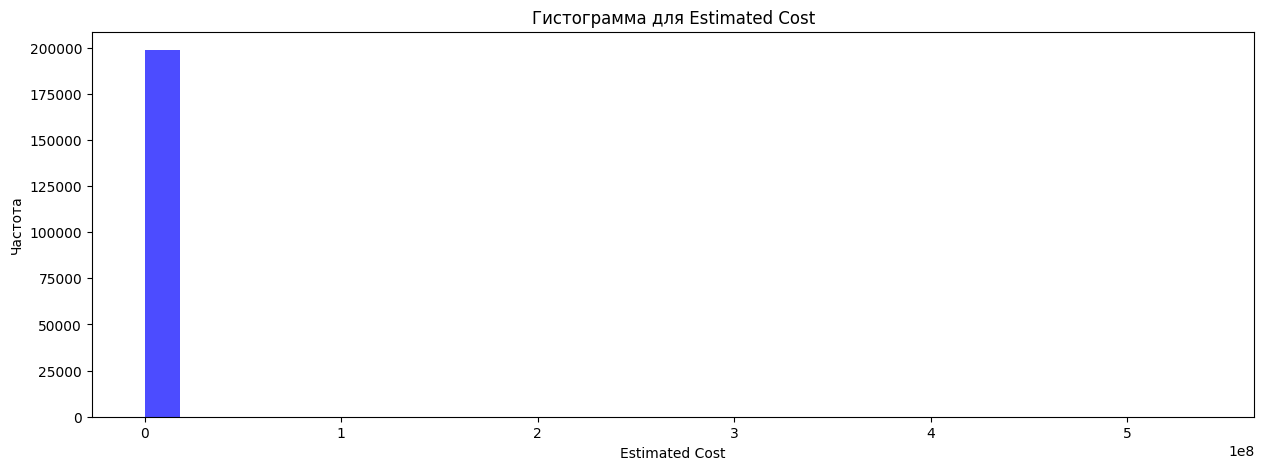

Минимальное значение : 1.0
Максимальное значение : 537958646.0


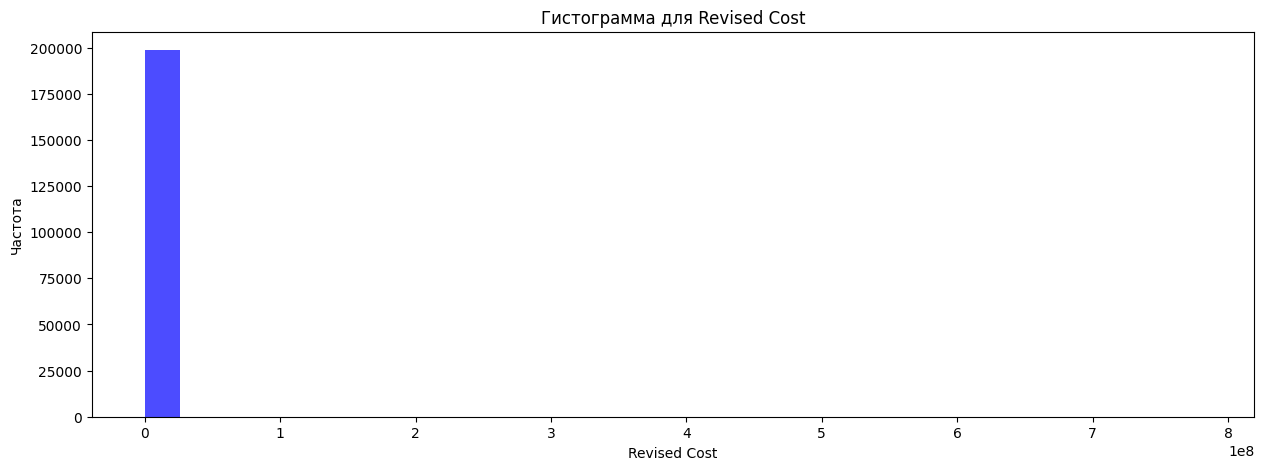

Минимальное значение : 0.0
Максимальное значение : 780500000.0


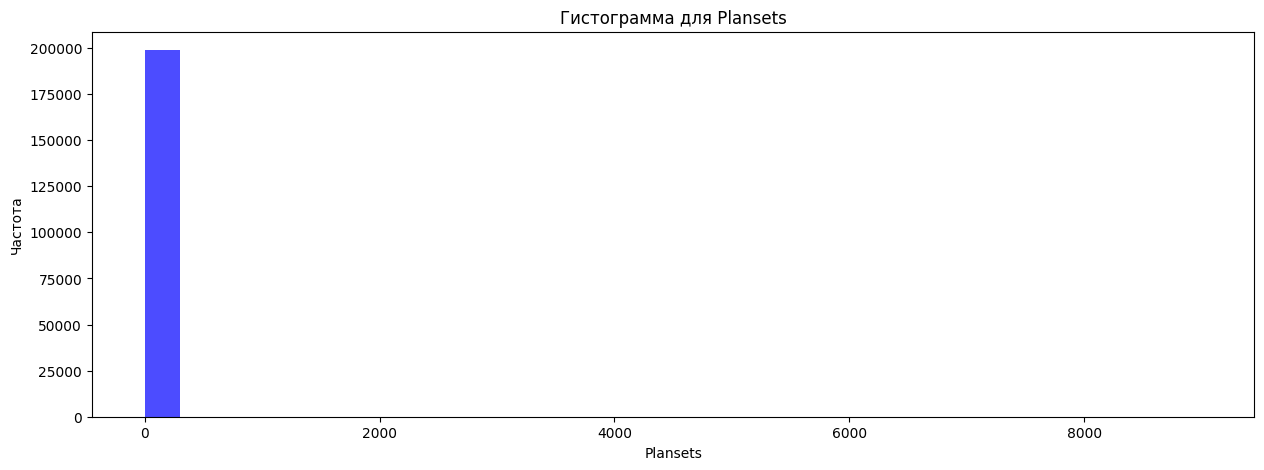

Минимальное значение : 0.0
Максимальное значение : 9000.0


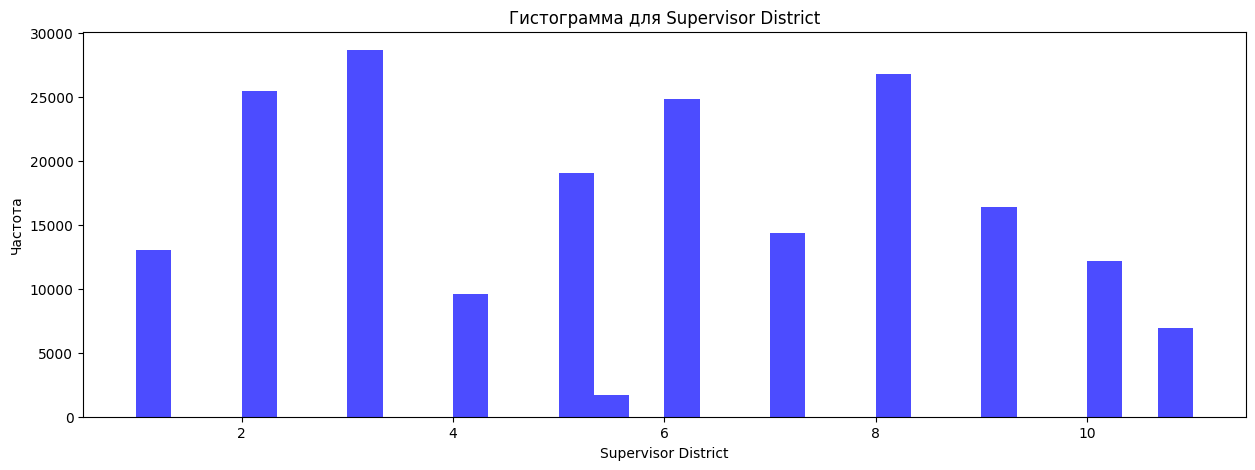

Минимальное значение : 1.0
Максимальное значение : 11.0


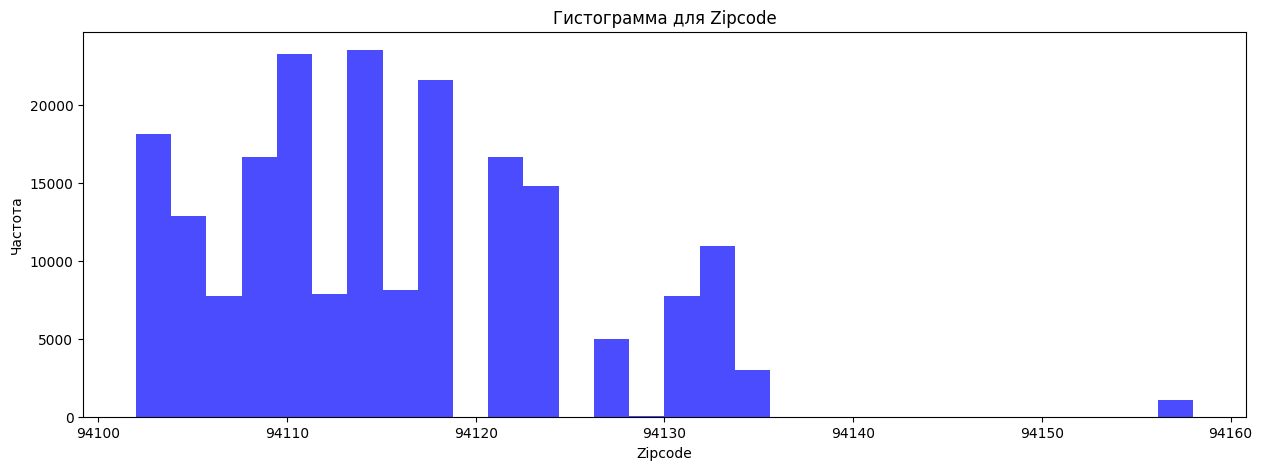

Минимальное значение : 94102.0
Максимальное значение : 94158.0


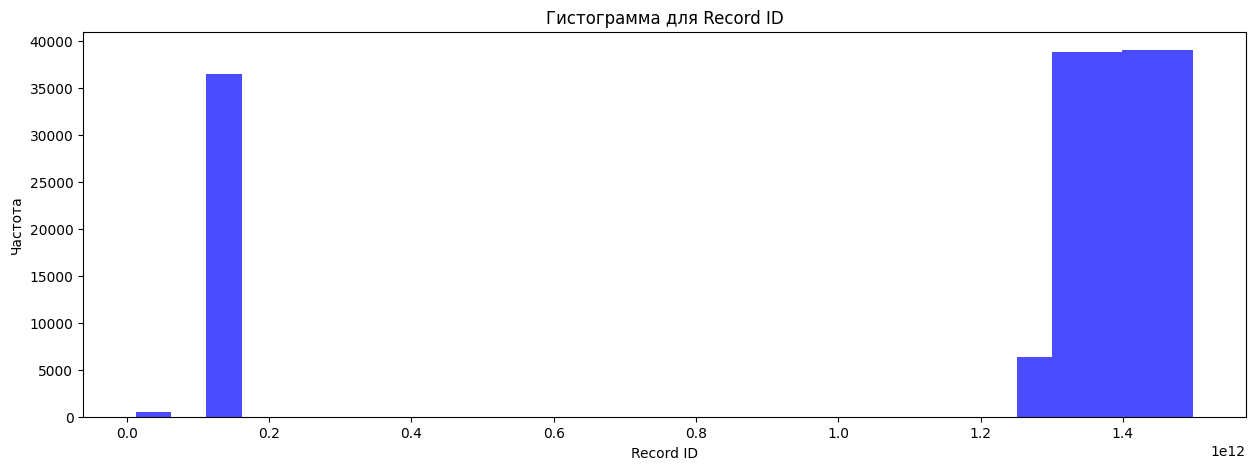

Минимальное значение : 12935321500.0
Максимальное значение : 1498342127659.0


In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))  

for column in num_columns:
    plt.figure(figsize=(15, 5))  # Новый размер для каждой гистограммы
    plt.hist(df[column], bins=30, alpha=0.7, color='blue')  # строим гистограмму
    plt.title(f'Гистограмма для {column}')
    plt.xlabel(column)
    plt.ylabel('Частота')
    plt.show()
    print(f'Минимальное значение : {df[column].min()}')
    print(f'Максимальное значение : {df[column].max()}')

Как мы видим по данным гистограммам, распределение количественных признаков везде отличается, приведем некоторые из этих распределений (а именно колонки Estimated Cost, Revised Cost и Street Number, так как у них самый сильных разброс между максимальным и минимальным значением) к нормальному виду с помощью логарифмирования

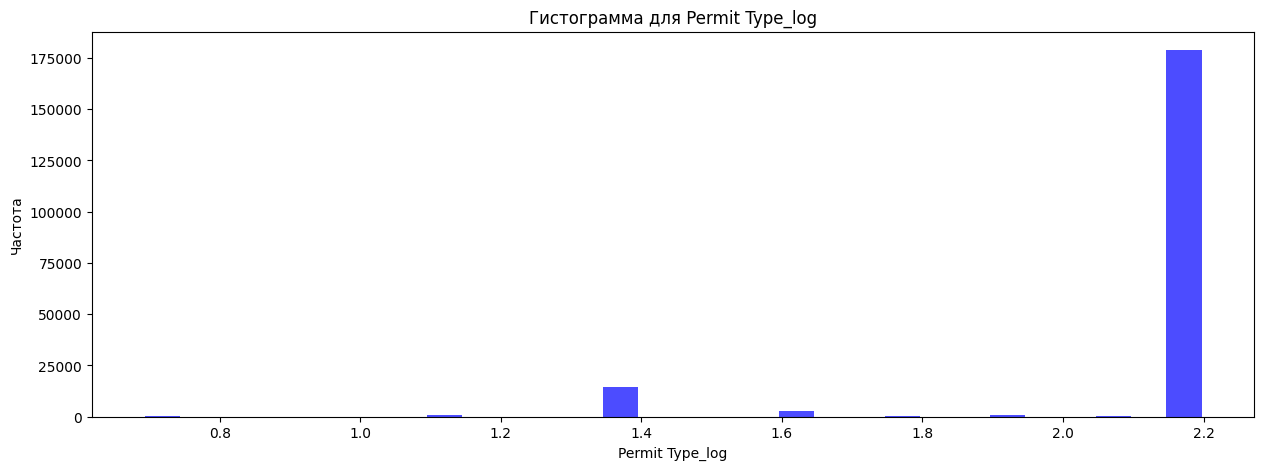

Минимальное значение : 0.6931471805599453
Максимальное значение : 2.1972245773362196


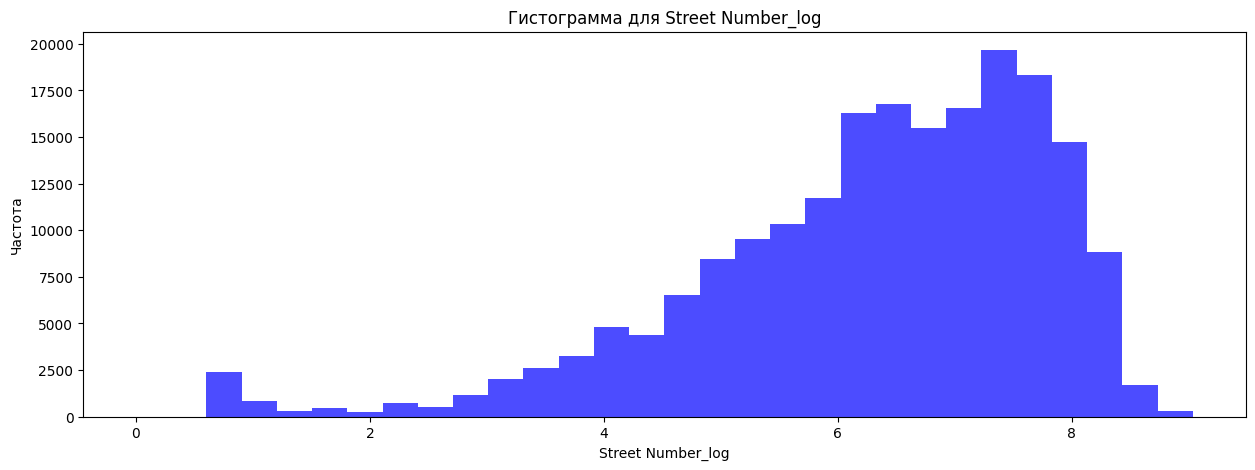

Минимальное значение : 0.0
Максимальное значение : 9.036106025364846


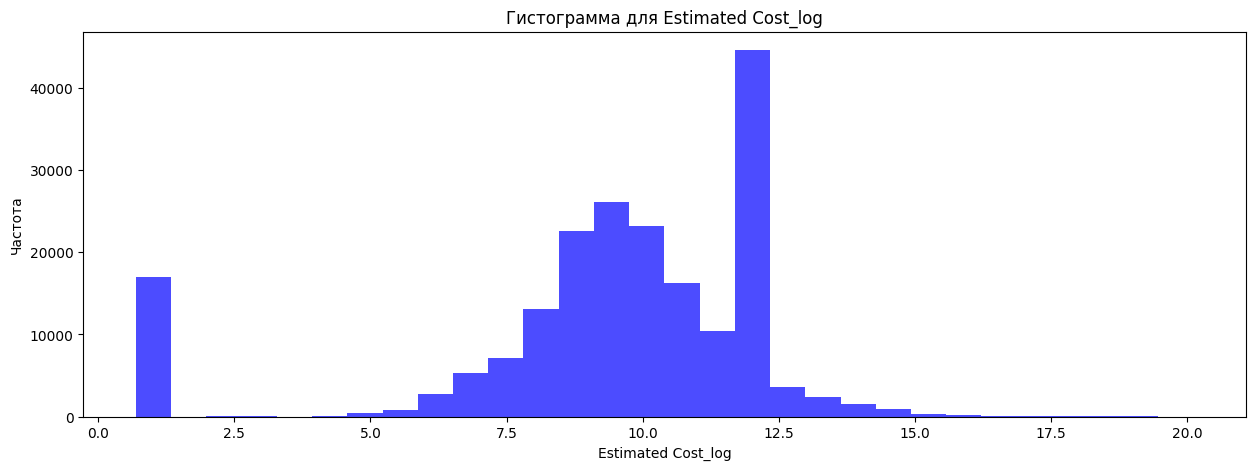

Минимальное значение : 0.6931471805599453
Максимальное значение : 20.103292250859578


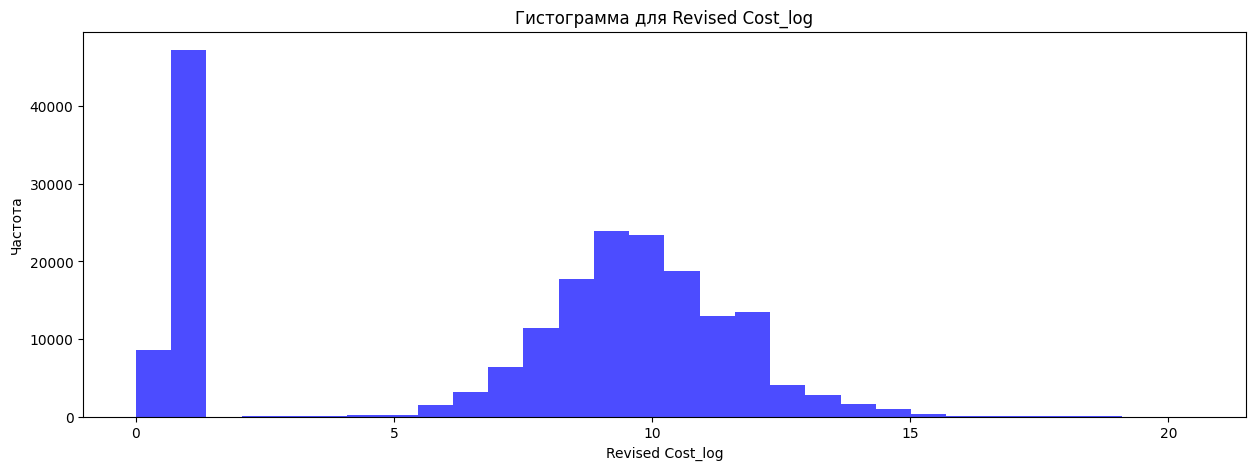

Минимальное значение : 0.0
Максимальное значение : 20.47544529920099


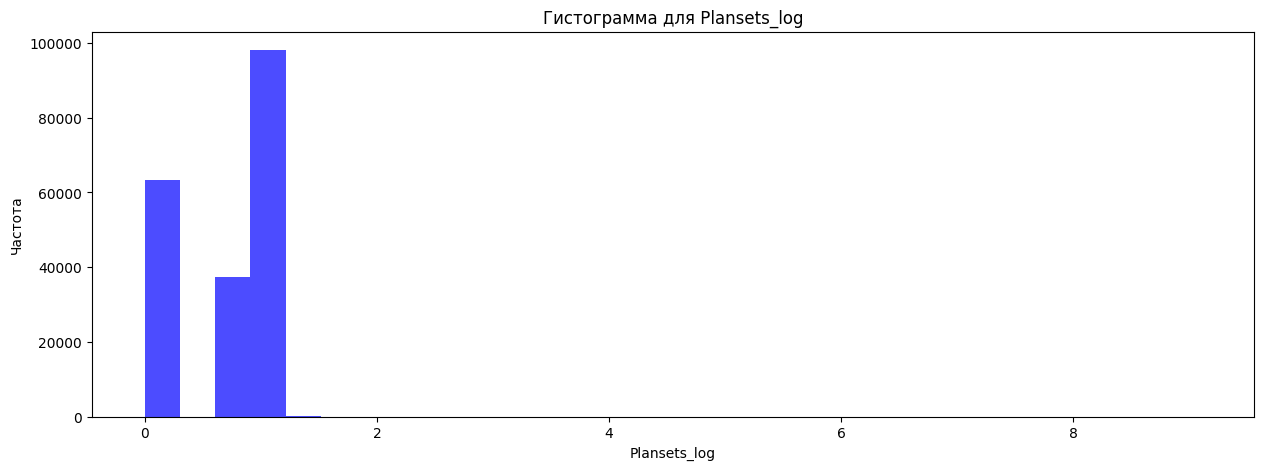

Минимальное значение : 0.0
Максимальное значение : 9.105090961257085


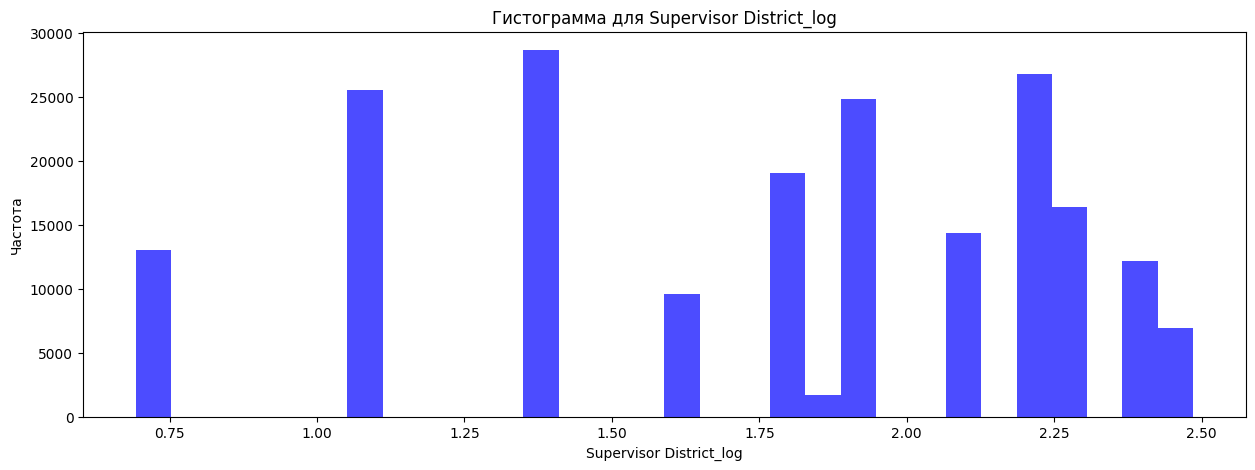

Минимальное значение : 0.6931471805599453
Максимальное значение : 2.4849066497880004


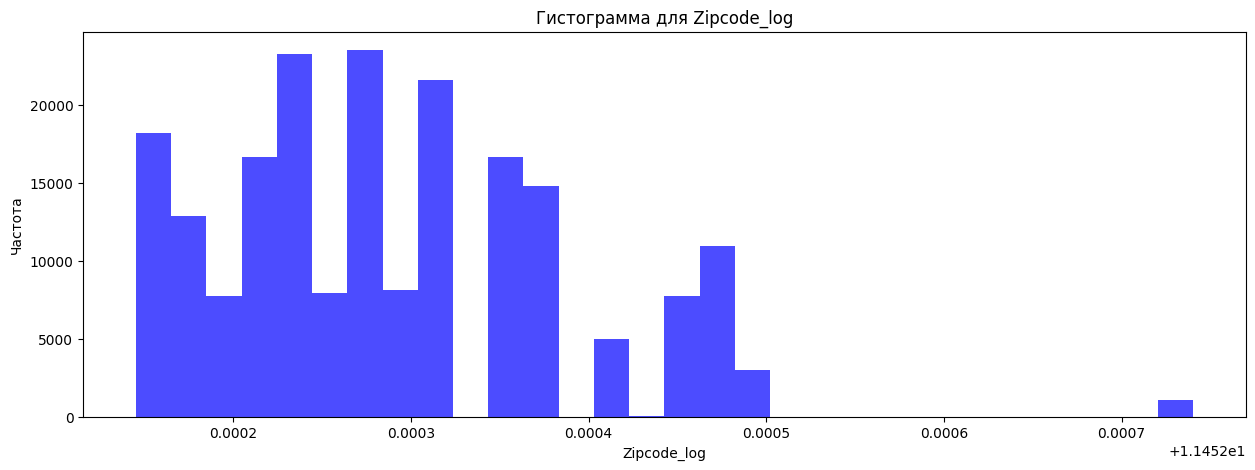

Минимальное значение : 11.452145206042967
Максимальное значение : 11.452740121656863


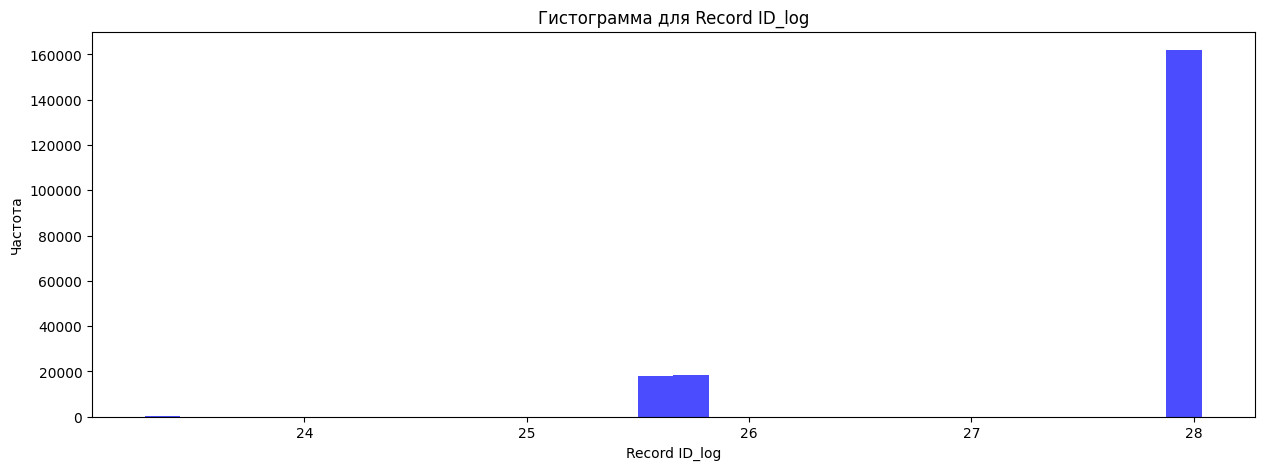

Минимальное значение : 23.28322750739728
Максимальное значение : 28.035380364572802


In [19]:
# Применяем логарифмическую трансформацию
for column in num_columns:
    # Добавляем 1, чтобы избежать логарифмирования нуля
    df[column + '_log'] = np.log1p(df[column])  

for column in num_columns:
    plt.figure(figsize=(15, 5))  
    plt.hist(df[column + '_log'], bins=30, alpha=0.7, color='blue')  
    plt.title(f'Гистограмма для {column + "_log"}')
    plt.xlabel(column + '_log')
    plt.ylabel('Частота')
    plt.show()  
    print(f'Минимальное значение : {df[column + "_log"].min()}')
    print(f'Максимальное значение : {df[column + "_log"].max()}')


В итоге мы масштабировали данные и уменьшили размах между минимальным и максимальным значением признака. А также приблизили некоторые столбцы к нормальному распределению.

Мы не масштабировали категориальные данные, так как ранее смотрели их размах значений и он был не так велик

Мы использовали данный подход, из-за сравнения признаков, так как если разные признаки имеют разные диапазоны значений, это может привести к тому, что более крупные значения будут доминировать над меньшими, что может исказить результаты модели

## Разделение выборки на тестовую и тренировочную

In [20]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=num_columns + ['Permit Type'])
y = df['Permit Type']

x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)